In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d

0 1
10 2
50 3
100 4


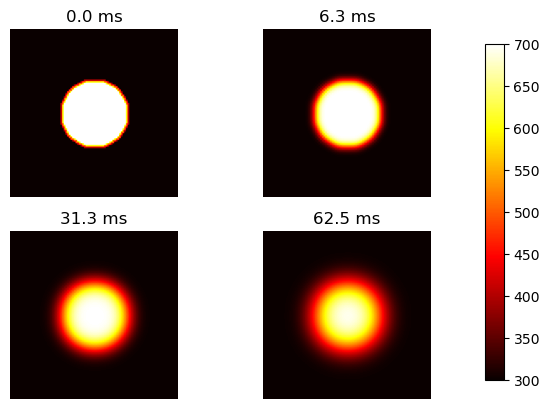

In [2]:
# plate size, mm
w = h = 10.
# intervals in x-, y- directions, mm
dx = dy = 0.1
# Thermal diffusivity of steel, mm2.s-1
D = 4.

Tcool, Thot = 300, 700

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

# Initial conditions - circle of radius r centred at (cx,cy) (mm)
r, cx, cy = 2, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0, u):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

# Number of timesteps
nsteps = 101
# Output 4 figures at these timesteps
mfig = [0, 10, 50, 100]
fignum = 0
fig = plt.figure()
for m in range(nsteps):
    u0, u = do_timestep(u0, u)
    if m in mfig:
        fignum += 1
        print(m, fignum)
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(u.copy(), cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=Thot)
        ax.set_axis_off()
        ax.set_title('{:.1f} ms'.format(m*dt*1000))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [3]:
import xgcm
import xarray as xr

In [4]:
def psi_sb(z0,gamma):
    return LAABW/H/gamma*Gamma_ice*np.exp((y+Lchannel+LAABW)/LAABW-1)/(np.exp(1)-2)

In [5]:
def psi_basin(z0,gamma):
    return

In [6]:
def psi_channel(channelgrid):
     #*np.ones(np.size(channelgrid))

IndentationError: expected an indented block (629352139.py, line 2)

In [9]:
zgrid_psi=np.ones([1,Nz])
zgrid_psi[0,19:]=np.linspace(1,0,31)
zgrid_psi

NameError: name 'Nz' is not defined

In [90]:
Lchannel=2500 #km
Lbasin=10000 #km
LAABW=100 #km
LNADW=150
Lice=500 #km
dy=50 #km
dz=100 #m
H=5000 #m
Nz=50 
Nchannel=50
Nbasin=200 #200*50=10000 for tracers
Gamma_ice=1.5e-7 #kg m-2 s-1
tau=0.1 #N m-2
rho0=1000 #kg m-3
f=-1e-4 #s-1
ybasin=np.arange(0,10000,50)



T_gamma=2* 86400*14 #2 week relaxation
gamma_iceN=27.9
y_iceN=-2000 #latitude at the Northern edge of ice
gamma_channelN=25.9
y_channelN=0 #latitude at the Northern edge of the channel
psi_mean=tau/rho0/f
zgrid_psi=np.ones([1,Nz])
zgrid_psi[0,19:]=np.linspace(1,0,31)




#psi=tw/f/rho0+Ke*S
Zp1=np.arange(0,-H-dz,-dz)
Zl=Zp1[1:]
Zu=Zp1[:-1]
Z=(Zl+Zu)/2

#gamma_sb= -Lchannel+Z*LAABW/H#southern boundary
#psi_sb= LAABW/H/#southern boundary
#channelgrid=np.zeros(Nchannel,Nz)
#gamma_surf=
#Gamma_surf=Gamma_ice*np.exp((y+Lchannel+LAABW)/LAABW-1)/(np.exp(1)-2)
gamma_channelgrid=np.zeros([Nchannel,Nz])
yid_ice=np.arange(0,10,1)
yid_channel_no_ice=np.arange(10,51,1)


In [29]:
w_sample_depth

[0,
 -800.0,
 -900.0,
 -1000,
 -1200.0,
 -1500.0,
 -1800.0,
 -2100.0,
 -2300.0,
 -2500.0,
 -2750.0,
 -3100.0,
 -3500.0,
 -4000,
 -4500.0,
 -4700.0,
 -5000]

In [102]:
gamma_sample=[25.9,26,27,27.6,27.9,28]
gamma_sample_depth=[0,-200.0,-1000.0,-2000.0,-4000.0,-5000.0]
w_sample=      [0, 1,1.5 ,1.5,0.5 ,0   , -2 , -4, -6, -8 ,-10, -12, -14 ,-16 ,-17, -16, 0]
w_sample_depth=[0 ,0.5,0.8 , 1 ,1.4, 1.5, 1.8, 2.1, 2.3 ,2.5, 2.75, 3.1 ,3.5, 4, 4.5, 4.7,5]
w_sample_depth=[i*-1000 for i in w_sample_depth]

fgamma = interp1d(gamma_sample_depth[::-1],gamma_sample[::-1], kind='cubic')
fw = interp1d(w_sample_depth[::-1],w_sample[::-1], kind='cubic')
gamma_basin_init=fgamma(Z)
w_init=fw(Zl)

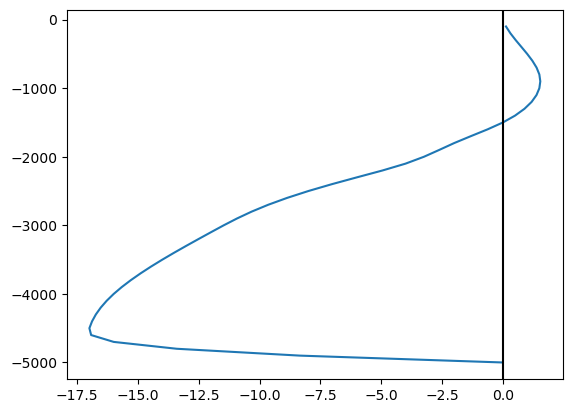

In [103]:
plt.plot(w_init,Zl)
plt.axvline(x=0,color='k')

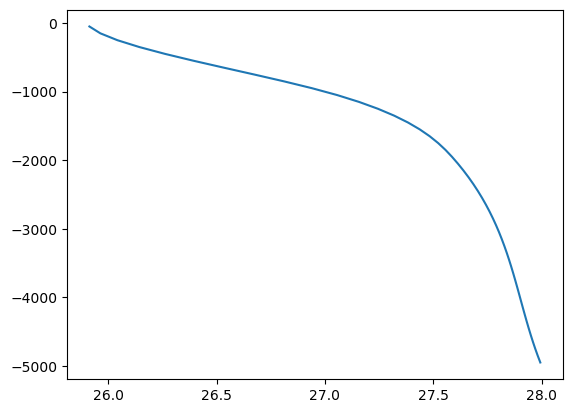

In [104]:
plt.plot(gamma_basin_init,Z)


In [105]:
kdia_outer=np.insert(kdia,0,0)
kdia_outer.shape

(51,)

In [106]:
ksurf=1e-5
kdeep=1e-4
Zsill=-2000 #m
Hsill=750 #m
kv=1e-4
kdia=0.5*(ksurf+kdeep)+0.5*(ksurf-kdeep)*np.tanh((Zl-Zsill)/Hsill)

In [16]:
pgamma_pz_inner=(gamma_basin_init[:-1]-gamma_basin_init[1:])/(Z[:-1]-Z[1:]) #on Z inner
pgamma_pz_lower=np.append(pgamma_pz_inner,0)
pgamma_pz_outer=np.insert(pgamma_pz_lower,0,0)
kdia_outer=np.insert(kdia,0,0)
ppkdiagamma_ppz=(kdia_outer[:-1]*pgamma_pz_outer[:-1]-kdia_outer[1:]*pgamma_pz_outer[1:])/(Zp1[:-1]-Zp1[1:])  #on Z center
ppkdiagamma_ppz_inner=(ppkdiagamma_ppz[:-1]+ppkdiagamma_ppz[1:])/2
w_inner=ppkdiagamma_ppz_inner/pgamma_pz_inner



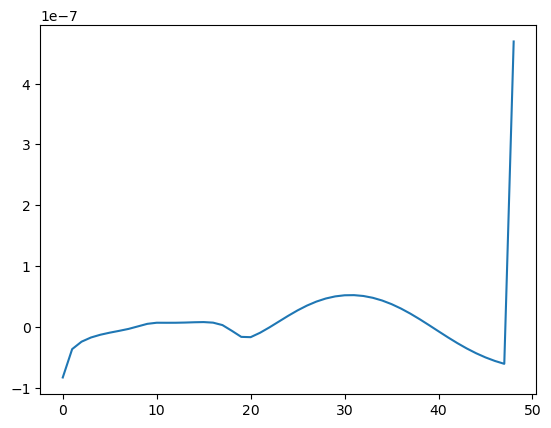

In [17]:
plt.plot(w_inner)

In [72]:
#np.r_[np.zeros(1,Nbasin),basin_streamfunc]
basin_streamfunc_zouter=np.c_[np.zeros(Nbasin),basin_streamfunc]
basin_streamfunc_zouter.shape

(200, 51)

In [96]:
v_basin_grid.shape
w_basin_grid.shape
v_basin_grid

array([[-7.88804653e-04, -1.10394419e-03, -1.30954186e-03, ...,
        -2.59155363e-02, -5.06385121e-02, -8.34459517e-02],
       [-7.84860630e-04, -1.09842447e-03, -1.30299415e-03, ...,
        -2.57859586e-02, -5.03853195e-02, -8.30287219e-02],
       [-7.80916607e-04, -1.09290474e-03, -1.29644644e-03, ...,
        -2.56563809e-02, -5.01321270e-02, -8.26114921e-02],
       ...,
       [-1.18320698e-05, -1.65591628e-05, -1.96431279e-05, ...,
        -3.88733044e-04, -7.59577681e-04, -1.25168927e-03],
       [-7.88804653e-06, -1.10394419e-05, -1.30954186e-05, ...,
        -2.59155363e-04, -5.06385121e-04, -8.34459517e-04],
       [-3.94402327e-06, -5.51972093e-06, -6.54770930e-06, ...,
        -1.29577681e-04, -2.53192560e-04, -4.17229758e-04]])

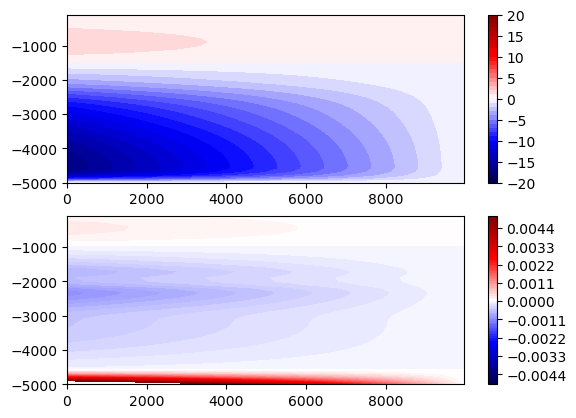

In [115]:
pgamma_pz=(gamma_basin_init[:-1]-gamma_basin_init[1:])/(Z[:-1]-Z[1:]) #on Z inner
pgamma_pz_lower=np.append(pgamma_pz,0)
pgamma_pz_outer=np.insert(pgamma_pz_lower,0,0)
ppgamma_ppz=(pgamma_pz_outer[:-1]-pgamma_pz_outer[1:])/(Zp1[:-1]-Zp1[1:])  #on Z center

w_inner=-kdia[:-1]*pgamma_pz/((gamma_basin_init[:-1]+gamma_basin_init[1:])/2)
w=np.append(w_inner,0)
w=w_init/basin_width/Lbasin/1000/1000
w_basin_grid=np.tile(w,[Nbasin,1])
basin_width=28000 #km
w_transport=w_basin_grid*basin_width*dy*1000*1000*1e6

basin_streamfunc=np.cumsum(w_transport[::-1,:],axis=0)[::-1,:]
basin_streamfunc_zouter=np.c_[np.zeros(Nbasin),basin_streamfunc]
v_basin_grid=-(basin_streamfunc_zouter[:,:-1]-basin_streamfunc_zouter[:,1:])/(Zp1[:-1]-Zp1[1:])/Lbasin/1000


plt.subplot(2,1,1)
plt.contourf(ybasin,Zl,basin_streamfunc.T/1e6,cmap='seismic',levels=np.arange(-20,20.5,1))

#plt.contourf(ybasin,Zl,w_transport.T)
plt.colorbar()
plt.subplot(2,1,2)


#plt.contourf(ybasin,Zl,w_transport.T)
#plt.colorbar()
plt.contourf(ybasin,Zl,v_basin_grid.T,cmap='seismic',levels=np.arange(-0.005,0.0051,0.0001))
plt.colorbar()

In [ ]:
##write a 2D solver here
#boundary condition

#advection
##tracer on the face(interpolate) 
tracer=tracer[:,]

#diffusion

In [61]:
basin_grid=np.zeros([Nbasin,Nz])
diapycnal_trans=kv*


In [64]:
gamma_basin_init_xr=xr.DataArray(gamma_basin_init, coords=[Z], dims=["Z"])
ds = xr.Dataset(
        coords={
            "Z": (
                ["Z"],
                Z,
               {"axis": "Z"},
            ),
            "Zp1": (
                ["Zp1"],
                Zp1,
                {"axis": "Z", "c_grid_axis_shift": (-0.5, 0.5)},
            ),
        }
    )


In [65]:
gamma_basin_init_xr
ds

<xarray.DataArray (Z: 50)>
array([25.925 , 25.975 , 26.0625, 26.1875, 26.3125, 26.4375, 26.5625,
       26.6875, 26.8125, 26.9375, 27.03  , 27.09  , 27.15  , 27.21  ,
       27.27  , 27.33  , 27.39  , 27.45  , 27.51  , 27.57  , 27.6075,
       27.6225, 27.6375, 27.6525, 27.6675, 27.6825, 27.6975, 27.7125,
       27.7275, 27.7425, 27.7575, 27.7725, 27.7875, 27.8025, 27.8175,
       27.8325, 27.8475, 27.8625, 27.8775, 27.8925, 27.905 , 27.915 ,
       27.925 , 27.935 , 27.945 , 27.955 , 27.965 , 27.975 , 27.985 ,
       27.995 ])
Coordinates:
  * Z        (Z) float64 -50.0 -150.0 -250.0 ... -4.75e+03 -4.85e+03 -4.95e+03